# Milestone #4

**Prompt:**

For the upcoming milestone, we will build some baseline models with basic features. You are free to explore on your own to investigate which features are useful. Here are some examples to get you started:

1. "meta" features (e.g. as most of you discovered, essay length seems to be a good indicator of score)
2. Essay "content" features, where the content is given by the bag-of-words. I.e. Use CountVectorizer or TfidfVectorizer (I recommend TfidfVectorizer) to get a feature vector for each essay
3. Prompt content features.
4. Combinations of the above.

Always be sure to report train/test scores, and feel free to experiment with regularization, ngram size for vectorizers, etc.

Note: feature vectors you get from (2) and (3) will be sparse. Therefore in order to combine (2) with (1), you will need to make (1) sparse as well.

Let me know if your group wants to meet with me to discuss more in person.

In [26]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
essay_df = pd.read_csv("datasets/training_set_rel3.tsv", delimiter="\t")
essay_df.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
essay_df.shape

(12976, 28)

In [4]:
vectorizer = TfidfVectorizer(stop_words="english", min_df=4, decode_error="ignore")
corpus = essay_df["essay"].values
essay_vector = vectorizer.fit_transform(corpus)
essay_vector = essay_vector.toarray()

In [5]:
essay_vector.shape

(12976, 10017)

Each essay vector has dimension ~10k

In [6]:
# adding an essay length column to the dataframe
essay_df["essay_length"] = map(len, essay_df["essay"])

In [7]:
essay_df.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,essay_length
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1875
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2288


In [8]:
feature_df = pd.DataFrame(essay_vector)

### We should also make sure to turn essay prompts into features.

In [9]:
def get_essay_x_y(data):
    y = data["domain1_score"]
    X = data.drop("domain1_score", axis=1)
    return X, y

In [10]:
feature_df["essay_set"] = essay_df["essay_set"]
feature_df["essay_length"] = essay_df["essay_length"]
feature_df["domain1_score"] = essay_df["domain1_score"]

In [11]:
print feature_df.shape
feature_df.head(2)

(12976, 10020)


,0,1,2,3,4,5,6,7,8,9,...,10010,10011,10012,10013,10014,10015,10016,essay_set,essay_length,domain1_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1875,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2288,9


In [12]:
X, y = get_essay_x_y(feature_df)

In [ ]:
### USING PCA TAKES WAY TO LONG 
# ## Let's try to reduce the number of dimensions using PCA 
# #Apply PCA to data and get the top 50 axes of maximum variation
# pca = PCA(n_components= 3)
# pca.fit(X)

# #Project to the data onto the three axes
# x_reduced = pca.transform(X)

In [37]:
# Here is a lasso 
lasso  = Lasso(1)
lasso.fit(X,y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
y_predict = lasso.predict(X)

In [39]:
print y_predict[0:10]
print "here are the y", y[0:10]

[  3.56651288   6.0712821    1.54086416  11.39012618   7.77549554
  -0.06631222   9.22498668   8.7155421    6.76267118   8.15757898]
here are the y 0     8
1     9
2     7
3    10
4     8
5     8
6    10
7    10
8     9
9     9
Name: domain1_score, dtype: int64


In [43]:
r_value = pearsonr(y, y_predict)[0]
r_value

0.80564737602072733

## Let's use K-Fold Validation to see how well our models work

In [56]:
# convert from panda to numpy array 
X_np = np.array(X)

pandas.core.series.Series

In [61]:
## THIS TAKES LIKE 5 MINUTES TO RUN
## ONLY RUN IF YOU REALLY WANT TO

n = len(X_np)

# fold n times 
n_folds = 2

# gives us the different folds of our data to test against
kf = KFold(n, n_folds=n_folds, shuffle = True)


alpha_list = [.01 , 1, 10, 100]

r_value = [] 
## Let's iterate through different alphas, 
# this takes forever, so I wont use that many values 
for alpha in alpha_list: 

    r_temp = [] 
    
    print "we are on alpha", alpha

    ## this gives us the different data to test on. 
    for train_index, test_index in kf:
        x_train_fold, x_test_fold = X_np[train_index], X_np[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        

        lasso = Lasso(alpha)
        
        # fit on the training data 
        lasso.fit(x_train_fold, y_train_fold)
        
        y_pred = lasso.predict(x_test_fold)
        
        ## append on the different r values 
        r_temp.append(pearsonr(y_test_fold, y_pred)[0])
    
    r_value.append(np.mean(r_temp))

        
    


we are on alpha 0.01
we are on alpha 1
we are on alpha 10
we are on alpha 100


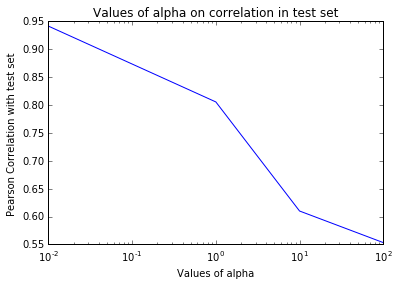

In [66]:
plt.semilogx(alpha_list, r_value)
plt.title("Values of alpha on correlation in test set") 
plt.xlabel("Values of alpha")
plt.ylabel("Pearson Correlation with test set")`

## Weird, are these pearson correlation values too high? 
Right now, we're getting pearson correlations around .95 for a LASSO. Is this too high? It feels like we wouldn't be predicting THAT well with a simple lasso model 

##  Let's compare our predictions using LASSO with the given values 

In [68]:
# I use .01 because that gave me the highest value on my kfold validation
lasso = Lasso(.01) 
lasso = lasso.fit(X,y)

In [69]:
y_predict = lasso.predict(X)

In [74]:
print "Here are the predicted values:", y_predict[0:10]
print "Here are the actual values:", np.array(y[0:10])

print "Here is the pearson correlation:", pearsonr(y_predict, y)[0]

Here are the predicted values: [  6.19137975   9.92046581   8.86469783  11.85815671   9.88026822
   3.63595735  11.89646103   9.04908863   8.11287908   8.92440748]
Here are the actual values: [ 8  9  7 10  8  8 10 10  9  9]
Here is the pearson correlation: 0.941612343682


In [ ]:
## Using spearmens correlation 